In [ ]:
%load_ext cudf.pandas   
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
    # df.select_dtypes(include = "object").describe().T

In [ ]:
import pandas_profiling
df.profile_report

In [ ]:
cont = []
cat = []
for col in df.columns:
    if df[col].value_counts().size > 2:
        cont.append(col)
    else: cat.append(col)

In [ ]:
def outlier_report(df, cols, whisker=3):
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*whisker 
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*whisker
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T
res = outlier_report(df, lst)

In [ ]:
# We can produce a function to get the number of outliers respectively each class. For the sake of practicality, we find the outliers for features without consideration of class distinction

def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
from sklearn import metrics
metrics.SCORERS.keys()

In [ ]:
dataframe.at[index,'column-name']='new value'

In [ ]:
##  adding label on top of a bar

plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df3.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [ ]:
generation[generation.isnull().any(axis=1)]

In [ ]:
pd.to_datetime(df.DateTime).dt.date
pd.to_datetime(df.DateTime).dt.time

In [ ]:
pd.to_datetime(df.DateTime).dt.strftime('%m/%d')

In [ ]:
df.loc[(df['date'].dt.day==25) & (cust_df['date'].dt.month==12), 'xmas'] = 1

In [ ]:
df.replace(",","",regex=True,inplace=True)

In [ ]:
df = df.iloc[:, [0,1,2,3,4,5,7,8,9,6]]
df

# pip install scikit-learn-intelex
pandas  ----> modin
sklearn *-----> intelex
eğitim sürecini hızlandırmak için intel işlemciye sahip PC lerder kullanılır
intelex ML için uygundur DL de sonuç vermez

https://medium.com/intel-analytics-software/save-time-and-money-with-intel-extension-for-scikit-learn-33627425ae4

In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.svm import SVC
# Your subsequent code without any changes
...

In [ ]:
# from sklearn.svm import SVC
from sklearnex.svm import SVC
# Your subsequent code without any changes
...

[Text(0, 0, '11428'), Text(0, 0, '3571')]

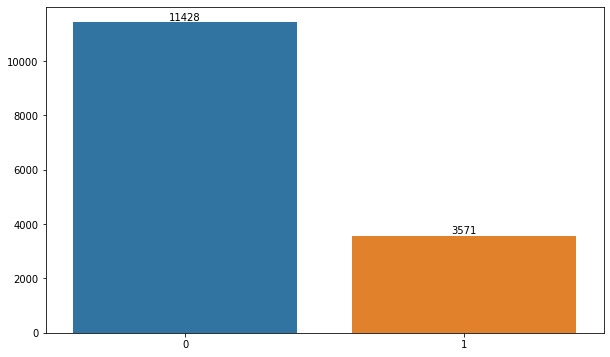

In [ ]:
fig = sns.barplot(data=df, y=df.left.value_counts().values , x=df.left.value_counts().index)
plt.bar_label(fig.containers[0])

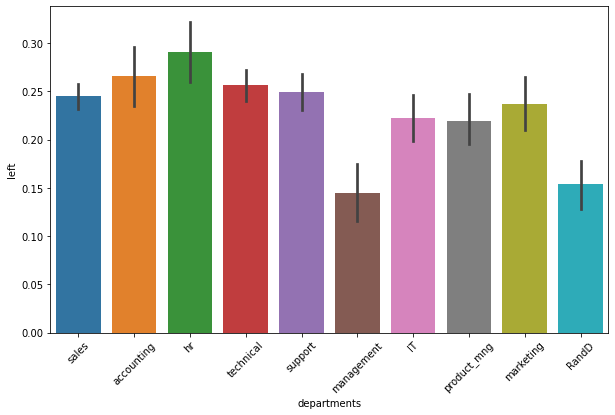

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(10, 6))
sns.barplot(data=df, x="departments", y="left")
axs.tick_params(axis='x', rotation=45)

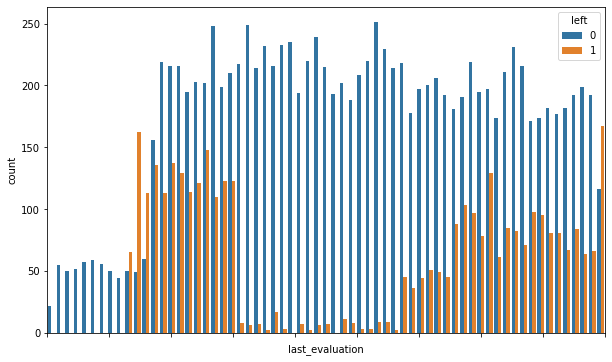

In [ ]:
fig = sns.countplot(data=df, x="last_evaluation", hue="left")
fig.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.show()

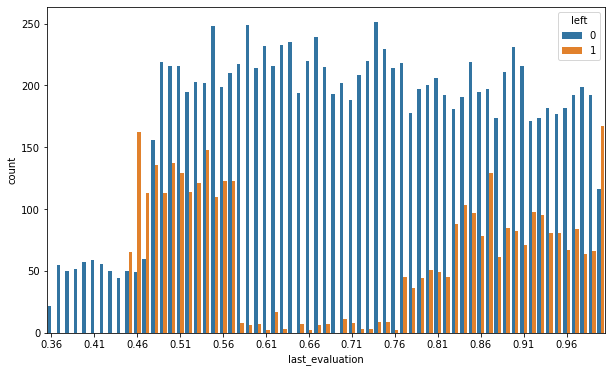

In [ ]:
fig = sns.countplot(data=df, x="last_evaluation", hue="left")
new_ticks = [i.get_text() for i in fig.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 5), new_ticks[::5])
plt.show()